## 行列・ベクトル演算

### ノートブックの起動

```bash
uv run --with "jupyter,matplotlib,numpy,soundfile" jupyter lab
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import timeit

$$
\boldsymbol{x} ^{\mathsf{H}} \boldsymbol{y} = \sum _{i=1} ^{N} x _{i} ^{\ast} y _{i}
$$

In [2]:
N = 100
x = np.random.rand(N) + 1j * np.random.rand(N)
y = np.random.rand(N) + 1j * np.random.rand(N)

In [3]:
%%timeit
z = 0
for i in range(N):
    z += np.conj(x[i]) * y[i]

39.9 μs ± 789 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%%timeit
z2 = np.conj(x) @ y

684 ns ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
z = 0
for i in range(N):
    z += np.conj(x[i]) * y[i]
z2 = np.conj(x) @ y
print(z, z2)

(50.14326550805943-0.9377950722536003j) (50.1432655080594-0.9377950722535999j)


$$
\boldsymbol{x} \boldsymbol{y} ^{\mathsf{H}} = Z \quad
z _{ij} = x_i y_j ^{\ast}
$$

In [8]:
%%timeit
Z = np.zeros((N, N), dtype=x.dtype)
for i in range(N):
    for j in range(N):
        Z[i, j] = x[i] * np.conj(y[j])

4.13 ms ± 32.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
x.shape

(100,)

In [10]:
x[:, None].shape

(100, 1)

In [13]:
print(np.newaxis)

None


In [11]:
%%timeit
Z2 = x[:, None] * np.conj(y[None, :])
# Z2 = x[:, None] * np.conj(y[:, None].T)

10.7 μs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
Z = np.zeros((N, N), dtype=x.dtype)
for i in range(N):
    for j in range(N):
        Z[i, j] = x[i] * np.conj(y[j])
Z2 = x[:, None] * np.conj(y[None, :])
print(np.allclose(Z, Z2))

True


$$
A \boldsymbol{x} = \boldsymbol{y} \quad y_i \sum _{j=1} ^{N} a_{ij} x_{j}
$$

In [18]:
A = np.random.rand(N, N)

In [19]:
%%timeit
y = np.zeros(N, dtype=x.dtype)
for i in range(N):
    for j in range(N):
        y[i] += A[i, j] * x[j]

2.27 ms ± 45.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
y = A @ x

12.2 μs ± 66.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
y = np.zeros(N, dtype=x.dtype)
for i in range(N):
    for j in range(N):
        y[i] += A[i, j] * x[j]
y2 = A @ x
print(np.allclose(y, y2))

True


$\boldsymbol{x} ^{\mathsf{H}} A \boldsymbol{x}$

- $A B$
- $C \coloneqq AB$
- $c _{ij} = \sum _{k} a_{ik} b_{kj}\quad (i, j = 1, \dots, N)$
- $\mathcal{O}(N^3)$

In [22]:
A = np.random.rand(N, N)
B = np.random.rand(N, N)

In [25]:
%%timeit
C = np.zeros_like(A)  # A と同じ形状・型のゼロ行列
for i in range(N):
    for j in range(N):
         for k in range(N):
             C[i, j] += A[i, k] * B[k, j]

208 ms ± 6.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
C = A @ B

9.1 μs ± 96.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


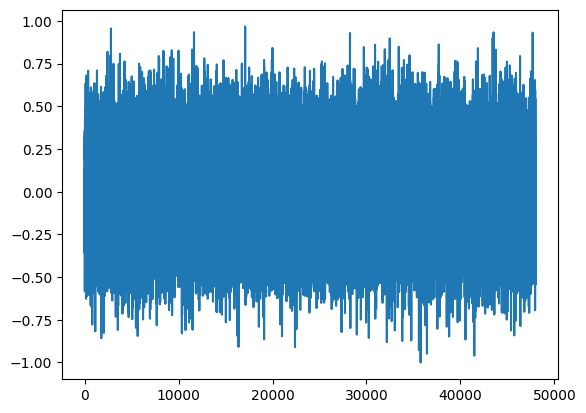

In [5]:
# 白色雑音 + 正弦波
fs = 16000
duration = 3
n_samples = duration * fs
x = np.random.normal(loc=0.0, scale=1.0, size=n_samples)
x /= np.max(np.abs(x))
plt.plot(x)